## 13 Алгоритмы кластеризации

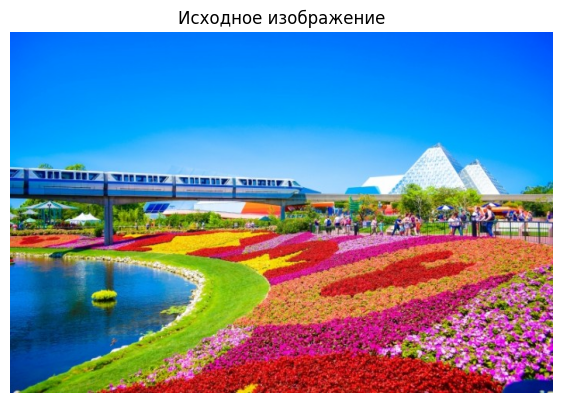

In [71]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

image = cv2.imread("../../src/Algorithm_Clustering.jpg")

def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image)
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

draw_picture(image, "Исходное изображение")

In [72]:
import numpy as np

height, width, _ = image.shape
pixels = image.reshape(-1, 3)

### Кластеризация KMeans

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


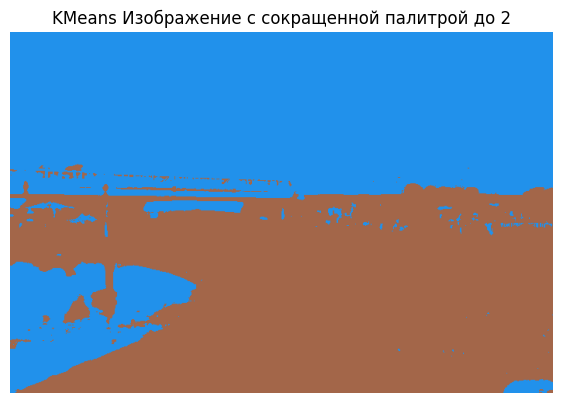

SSIM Score KMeans классов 2: 0.36541338478249874


d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


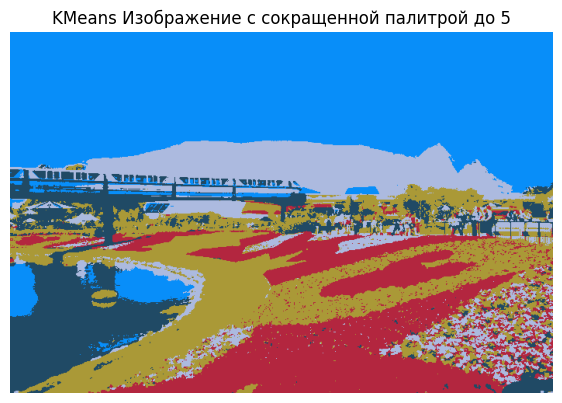

SSIM Score KMeans классов 5: 0.5091125394872846


d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


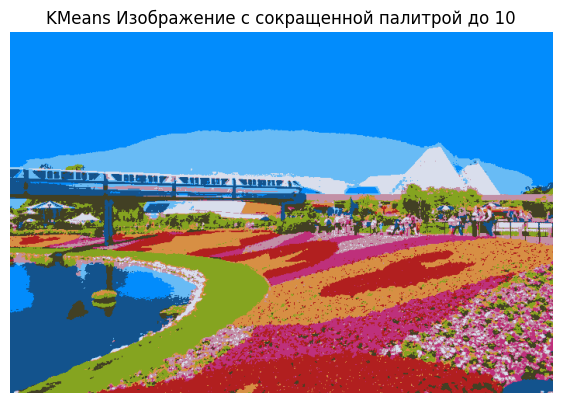

SSIM Score KMeans классов 10: 0.6823034981488202


d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


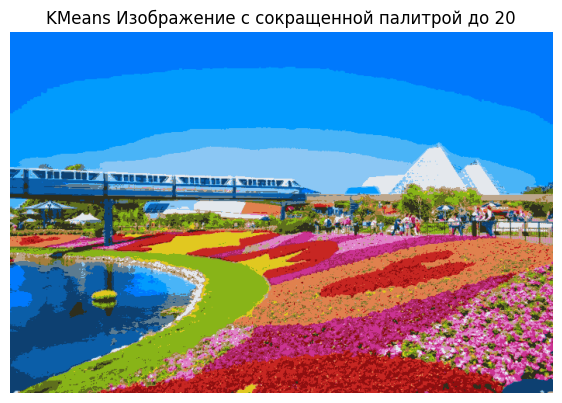

SSIM Score KMeans классов 20: 0.7811002415891721


In [90]:
from sklearn.cluster import KMeans

K = [2, 5, 10, 20]

def clKMeans(num_colors):
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)

    colors = kmeans.cluster_centers_
    labels = kmeans.predict(pixels)
    quantized_image = colors[labels].reshape(height, width, 3).astype(np.uint8)
    draw_picture(quantized_image, f"KMeans Изображение с сокращенной палитрой до {num_colors}")
    return quantized_image

quantized_image = None
for k in K:
    quantized_image = clKMeans(k)
    ssim_score = ssim(np.squeeze(image), np.squeeze(quantized_image), channel_axis=2)
    print(f"SSIM Score KMeans классов {k}: {ssim_score}")

### Кластеризация DBSCAN

SSIM Score DBSCAN: 0.3384398809234857


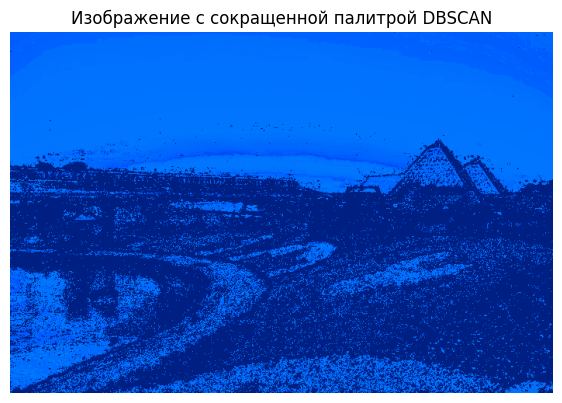

In [91]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

image = cv2.imread("../../src/Algorithm_Clustering.jpg")

height, width, _ = image.shape
pixels = image.reshape(-1, 3)

dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(pixels)

colors = dbscan.components_
num_colors = colors
quantized_image = colors[dbscan.labels_].reshape(height, width, 3).astype(np.uint8)

ssim_score = ssim(image, quantized_image, channel_axis=2)
print(f"SSIM Score DBSCAN: {ssim_score}")
draw_picture(quantized_image, f"Изображение с сокращенной палитрой DBSCAN")

### Кластеризация AgglomerativeClustering

SSIM Score AgglomerativeClustering K_values:2: 0.31281770148341065


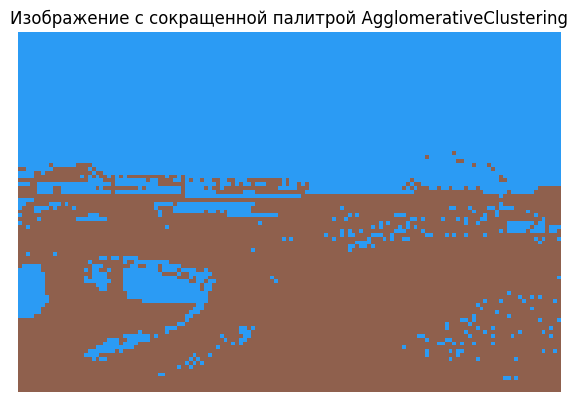

SSIM Score AgglomerativeClustering K_values:5: 0.5682564900029388


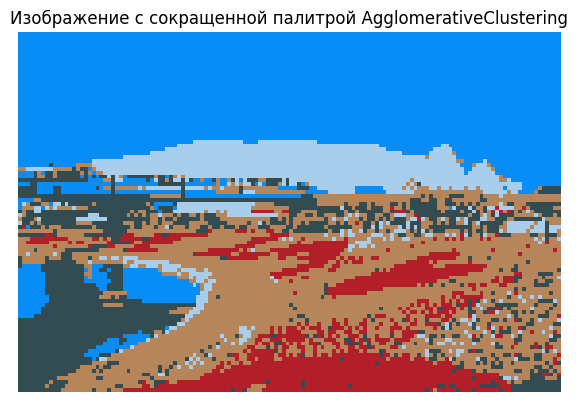

SSIM Score AgglomerativeClustering K_values:10: 0.6851982647020897


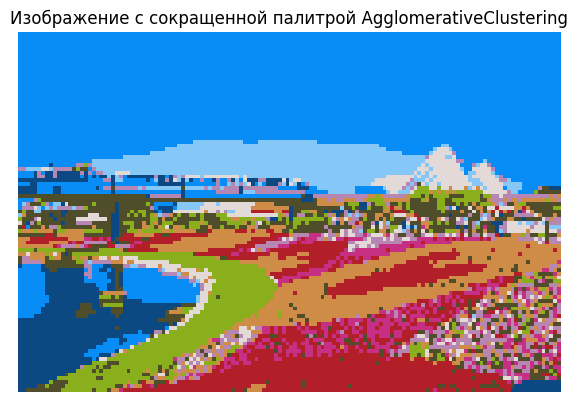

SSIM Score AgglomerativeClustering K_values:20: 0.8316627684817567


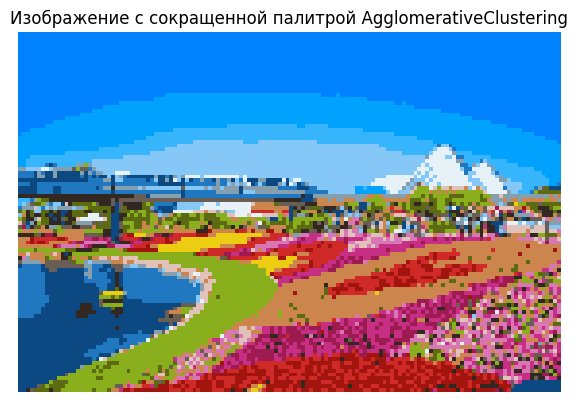

In [94]:
from sklearn.cluster import AgglomerativeClustering

image = cv2.imread("../../src/Algorithm_Clustering.jpg")
smaller_image = cv2.resize(image, (0, 0), fx=0.2, fy=0.2)

height, width, _ = smaller_image.shape
pixels = smaller_image.reshape(-1, 3)
K_values = [2, 5, 10, 20]

for K in K_values:
    agglomerative = AgglomerativeClustering(n_clusters=K)
    labels = agglomerative.fit_predict(pixels)
    unique_labels = np.unique(labels)
    colors = []
    for label in unique_labels:
        cluster_center = np.mean(pixels[labels == label], axis=0)
        colors.append(cluster_center)
    quantized_image = np.array([colors[label] for label in labels]).reshape(height, width, 3).astype(np.uint8)
    
    ssim_score = ssim(smaller_image, quantized_image, channel_axis=2)
    print(f"SSIM Score AgglomerativeClustering K_values:{K}: {ssim_score}")
    draw_picture(quantized_image, "Изображение с сокращенной палитрой AgglomerativeClustering")


### Вывод

+ `KMeans` показывает довольно сходное качество относительно входного изображения и имеет быструю скорость вычисления
  + `SSIM Score` классов `2`: `0.36541338478249874`
  + `SSIM Score` классов `5`: `0.5091125394872846`
  + `SSIM Score` классов `10`: `0.6823034981488202`
  + `SSIM Score` классов `20`: `0.7811002415891721` `Самое высокое значение` в данном методе

+ `DBSCAN` по сути сделал оттенки одного цвета, тем самым определив как шум многие точки
  + `SSIM Score` : `0.3384398809234857`
  + вероятно данный метод не подходить для преобразования изображения.

+ `AgglomerativeClustering` очень требователен к вычислениям, и потребовал сокращения входного размера изображения, при этом оперативная память на пределе, но схожесть с исходным самая высокая 
  + `SSIM Score` классов: `2` : `0.31281770148341065`
  + `SSIM Score` классов: `5` : `0.5682564900029388`
  + `SSIM Score` классов: `10` : `0.6851982647020897`
  + `SSIM Score` классов: `20` : `0.8316627684817567` `Самое высокое значение` из всех методов, но при уменьшении изображения